In [1]:
# package used : numpy, pandas,  matplotlib, sklearn,
# Acknowledges and references: 
# sklearn: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html
# dataset 1: UCI Mushroom Data Set: https://archive.ics.uci.edu/ml/datasets/mushroom
# dataset 2: breast cancer dataset from sklearn

In [2]:
# regular packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
# import data processing class from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [4]:
# import classification learners from sklearn: Decision Tree, K-NN, SVM, Boosting, NN
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Mushroom Dataset

In [5]:
# read data file
names = ["label",
"cap-shape",
"cap-surface",
"cap-color",
"bruises?",
"odor",
"gill-attachment",
"gill-spacing",
"gill-size",
"gill-color",
"stalk-shape",
"stalk-root",
"stalk-surface-above-ring",
"stalk-surface-below-ring",
"stalk-color-above-ring",
"stalk-color-below-ring",
"veil-type",
"veil-color",
"ring-number",
"ring-type",
"spore-print-color",
"population"]
data = pd.read_csv('agaricus_lepiota_data.csv',  index_col = False, names = names)
data = data.astype('category') 

In [6]:
# data pre-process. 
# convert a non-numerical column of ‘object’ to 'category'
# lables: encode 'e' as 0, 'p' as 1
# data: encode other columns with numbers 
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])
# veil_type only have one single value, droppping it won't affect the classification result.
data = data.drop(["veil-type"],axis=1)
y,X = data["label"].values,data.drop(["label"], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

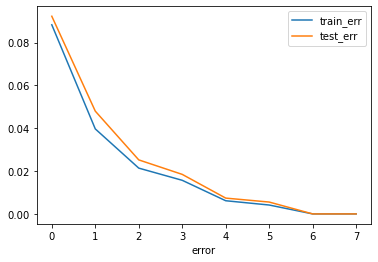

In [7]:
# decision tree, from sklearn.tree import DecisionTreeClassifier
train_err= []
test_err = []
for depth in range(2,10):
    learner = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=depth))
    learner.fit(X_train, y_train)
    train_score = learner.score(X_train, y_train)
    test_score = learner.score(X_test, y_test)
#     print('decision tree:',depth, train_score, test_score)
    train_err.append(1-train_score)
    test_err.append(1-test_score)
plt.plot(train_err, label = 'train_err')
plt.plot(test_err, label = 'test_err')
plt.xlabel('max_depth')
plt.xlabel('error')
plt.legend(loc="upper right")
plt.show()

neural networks: logistic 20 1000 0.8978304354516079 0.8941538461538462
neural networks: logistic 10 1000 0.8972149561470996 0.8886153846153846
neural networks: logistic 5 1000 0.9167564240652408 0.9083076923076923
neural networks: logistic 1 1000 0.9449146022464995 0.9433846153846154
neural networks: logistic 0.1 1000 0.9995383905216187 1.0
neural networks: tanh 20 1000 0.9146022464994614 0.9046153846153846
neural networks: tanh 10 1000 0.9364517618095092 0.9304615384615385
neural networks: tanh 5 1000 0.9547622711186337 0.952
neural networks: tanh 1 1000 0.998307431912602 0.9981538461538462
neural networks: tanh 0.1 1000 1.0 1.0
neural networks: relu 20 1000 0.9106016310201569 0.9021538461538462
neural networks: relu 10 1000 0.9472226496384059 0.9452307692307692
neural networks: relu 5 1000 0.9719956916448684 0.9704615384615385
neural networks: relu 1 1000 0.9995383905216187 0.9993846153846154
neural networks: relu 0.1 1000 1.0 1.0


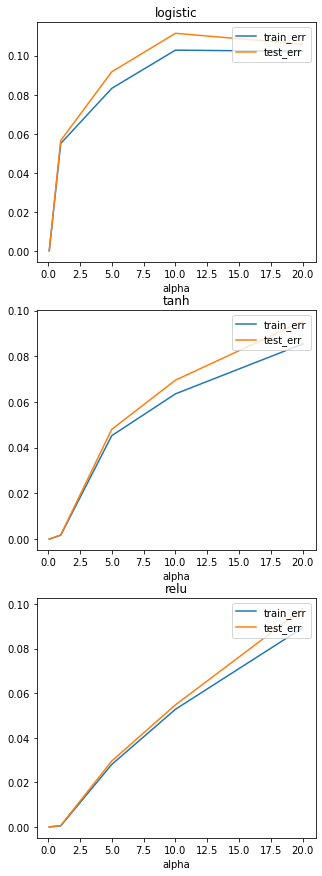

In [8]:
# neural network
# solver = 'lbfgs', max_iter = 1000
activation_lst = ['logistic', 'tanh', 'relu']
alpha_lst = [20, 10, 5, 1, 0.1]
max_iter = 1000
train_err_nn = np.empty((3,5))
test_err_nn = np.empty((3,5))

plt.figure(figsize=(5, 15))
for i, activation in enumerate(activation_lst):
    for j, alpha in enumerate(alpha_lst):
        learner = make_pipeline(StandardScaler(), MLPClassifier(activation=activation, alpha = alpha, max_iter = max_iter))
        learner.fit(X_train, y_train)
        train_score = learner.score(X_train, y_train)
        test_score = learner.score(X_test, y_test)
        train_err_nn[i][j] = 1-train_score
        test_err_nn[i][j] = 1-test_score
        print('neural networks:',activation,alpha, max_iter, train_score, test_score)
    plt.subplot(3,1, i+1)
    plt.plot(alpha_lst,train_err_nn[i], label = 'train_err')
    plt.plot(alpha_lst,test_err_nn[i], label = 'test_err')
    plt.xlabel('alpha')
    plt.legend(loc="upper right")
    plt.title(activation)
    plt.plot()
# print(train_err_nn)
# print(test_err_nn)
plt.show()

In [9]:
print(train_err_nn)
print(test_err_nn)

[[0.10216956 0.10278504 0.08324358 0.0550854  0.00046161]
 [0.08539775 0.06354824 0.04523773 0.00169257 0.        ]
 [0.08939837 0.05277735 0.02800431 0.00046161 0.        ]]
[[0.10584615 0.11138462 0.09169231 0.05661538 0.        ]
 [0.09538462 0.06953846 0.048      0.00184615 0.        ]
 [0.09784615 0.05476923 0.02953846 0.00061538 0.        ]]


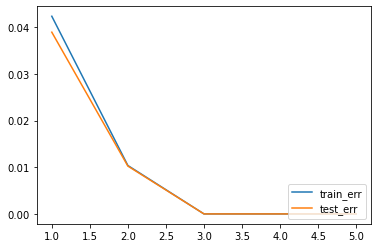

In [10]:
# Boosting
train_err_bst = []
test_err_bst = []
n_estimators_lst = [1,2,3,4,5]

for i,n_estimators in enumerate(n_estimators_lst):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=22,test_size=0.3)
    learner = make_pipeline(StandardScaler(), AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators))
    learner.fit(X_train, y_train)
    train_score = learner.score(X_train, y_train)
#     print(train_score)
    test_score = learner.score(X_test, y_test)
    train_err_bst.append(1-train_score)
    test_err_bst.append(1-test_score)
plt.plot(n_estimators_lst, train_err_bst, label = 'train_err')
plt.plot(n_estimators_lst,test_err_bst, label = 'test_err')
plt.legend(loc="lower right")
plt.plot()
plt.show()

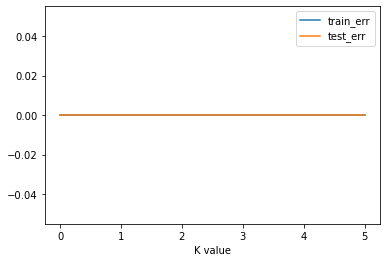

In [11]:
#K-NN
# try tune different K values
train_err_knn = []
test_err_knn = []
K_lst = [1,2,3,4,5,6]
for K in K_lst:
    learner = make_pipeline(StandardScaler(), KNeighborsClassifier(K))
    learner.fit(X_train, y_train)
    train_score = learner.score(X_train, y_train)
    test_score = learner.score(X_test, y_test)
    train_err_knn.append(1-train_score)
    test_err_knn.append(1-test_score)
plt.plot(train_err_knn, label = 'train_err')
plt.plot(test_err_knn, label = 'test_err')
plt.xlabel('K value')
plt.legend(loc="upper right")
plt.show()

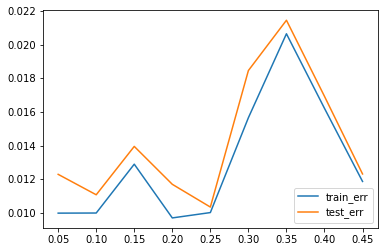

In [12]:
# support vector machine
# kernel_lst = ['linear', 'rbf']
# train_err_svm = np.empty((3,5))
# test_err_svm = np.empty((3,5))

# plt.figure(figsize=(8, 20))
# for i, kernel in enumerate(kernel_lst):
train_err_svm_linear = []
test_err_svm_linear = []
test_size_lst = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]

for i,test_size in enumerate(test_size_lst):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=22,test_size=test_size)
    learner = make_pipeline(StandardScaler(), SVC(kernel='linear'))
    learner.fit(X_train, y_train)
    train_score = learner.score(X_train, y_train)
    test_score = learner.score(X_test, y_test)
    train_err_svm_linear.append(1-train_score)
    test_err_svm_linear.append(1-test_score)
plt.plot(test_size_lst, train_err_svm_linear, label = 'train_err')
plt.plot(test_size_lst,test_err_svm_linear, label = 'test_err')
plt.legend(loc="lower right")
plt.plot()
plt.show()

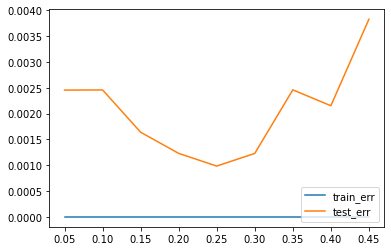

In [13]:
train_err_svm_rbf = []
test_err_svm_rbf = []
test_size_lst = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45]

for i,test_size in enumerate(test_size_lst):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=22,test_size=test_size)
    learner = make_pipeline(StandardScaler(), SVC(gamma=2))
    learner.fit(X_train, y_train)
    train_score = learner.score(X_train, y_train)
#     print(train_score)
    test_score = learner.score(X_test, y_test)
    train_err_svm_rbf.append(1-train_score)
    test_err_svm_rbf.append(1-test_score)
plt.plot(test_size_lst, train_err_svm_rbf, label = 'train_err')
plt.plot(test_size_lst,test_err_svm_rbf, label = 'test_err')
plt.legend(loc="lower right")
plt.plot()
plt.show()

# Cancer Dataset

In [14]:
#####################
# next cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

decision tree: 2 0.9296703296703297 0.9298245614035088
decision tree: 3 0.978021978021978 0.9473684210526315
decision tree: 4 0.9956043956043956 0.9385964912280702
decision tree: 5 0.9956043956043956 0.9385964912280702


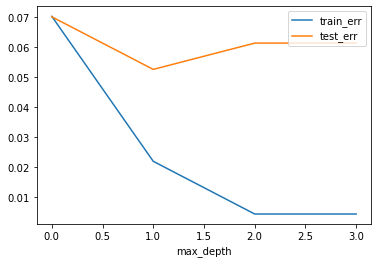

In [15]:
# decision tree, from sklearn.tree import DecisionTreeClassifier
train_err= []
test_err = []
for depth in range(2,6):
    learner = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=depth))
    learner.fit(X_train, y_train)
    train_score = learner.score(X_train, y_train)
    test_score = learner.score(X_test, y_test)
    print('decision tree:',depth, train_score, test_score)
    train_err.append(1-train_score)
    test_err.append(1-test_score)
plt.plot(train_err, label = 'train_err')
plt.plot(test_err, label = 'test_err')
plt.xlabel('max_depth')
plt.legend(loc="upper right")
plt.show()

neural networks: logistic 0.0 1000 0.9868131868131869 0.9912280701754386
neural networks: logistic 0.5 1000 0.9824175824175824 0.9824561403508771
neural networks: logistic 1.0 1000 0.9824175824175824 0.9824561403508771
neural networks: logistic 1.5 1000 0.9758241758241758 0.9824561403508771
neural networks: logistic 2.0 1000 0.9736263736263736 0.9824561403508771
neural networks: logistic 2.5 1000 0.9714285714285714 0.9824561403508771
neural networks: logistic 3.0 1000 0.967032967032967 0.9824561403508771
neural networks: logistic 3.5 1000 0.967032967032967 0.9736842105263158
neural networks: logistic 4.0 1000 0.9604395604395605 0.9649122807017544
neural networks: logistic 4.5 1000 0.9472527472527472 0.9649122807017544
neural networks: tanh 0.0 1000 0.9978021978021978 0.9824561403508771
neural networks: tanh 0.5 1000 0.989010989010989 0.9912280701754386
neural networks: tanh 1.0 1000 0.989010989010989 0.9736842105263158
neural networks: tanh 1.5 1000 0.9868131868131869 0.982456140350877

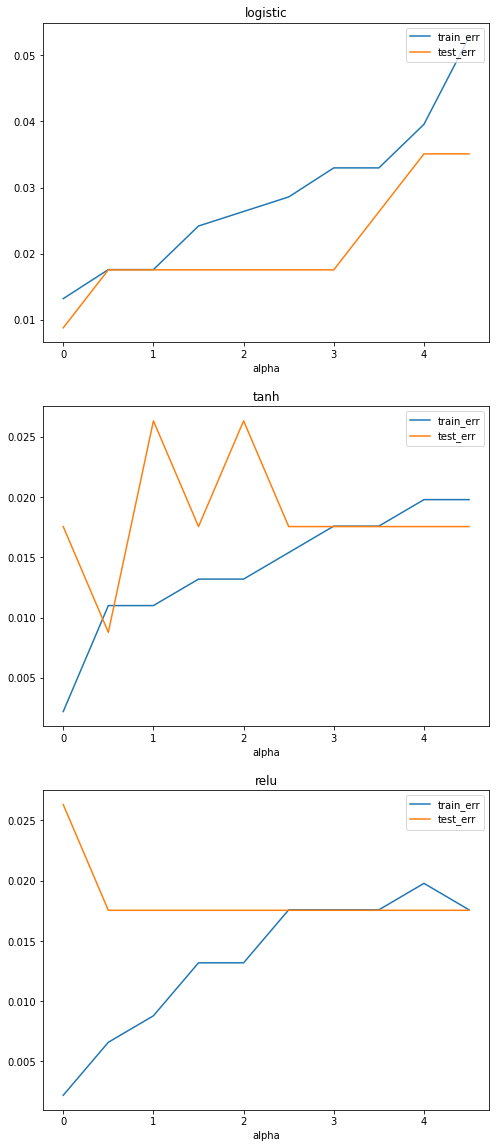

In [16]:
# neural network
# solver = 'lbfgs', max_iter = 1000
activation_lst = ['logistic', 'tanh', 'relu']
alpha_lst =  np.arange(0, 5, 0.5)
max_iter = 1000
train_err_nn = np.empty((3,len(alpha_lst)))
test_err_nn = np.empty((3,len(alpha_lst)))

plt.figure(figsize=(8, 20))
for i, activation in enumerate(activation_lst):
    for j, alpha in enumerate(alpha_lst):
        learner = make_pipeline(StandardScaler(), MLPClassifier(activation=activation, alpha = alpha, max_iter = max_iter))
        learner.fit(X_train, y_train)
        train_score = learner.score(X_train, y_train)
        test_score = learner.score(X_test, y_test)
        train_err_nn[i][j] = 1-train_score
        test_err_nn[i][j] = 1-test_score
        print('neural networks:',activation,alpha, max_iter, train_score, test_score)
    plt.subplot(3,1, i+1)
    plt.plot(alpha_lst,train_err_nn[i], label = 'train_err')
    plt.plot(alpha_lst,test_err_nn[i], label = 'test_err')
    plt.xlabel('alpha')
    plt.legend(loc="upper right")
    plt.title(activation)
    plt.plot()
print(train_err_nn)
print(test_err_nn)
plt.show()

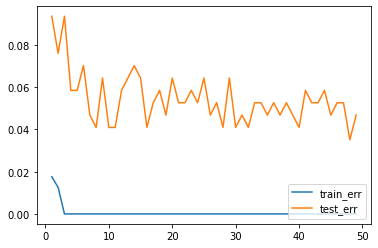

In [17]:
# Boosting
train_err_bst = []
test_err_bst = []
n_estimators_lst = np.arange(1,50,1)

for i,n_estimators in enumerate(n_estimators_lst):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=22,test_size=0.3)
    learner = make_pipeline(StandardScaler(), AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators))
    learner.fit(X_train, y_train)
    train_score = learner.score(X_train, y_train)
#     print(train_score)
    test_score = learner.score(X_test, y_test)
    train_err_bst.append(1-train_score)
    test_err_bst.append(1-test_score)
plt.plot(n_estimators_lst, train_err_bst, label = 'train_err')
plt.plot(n_estimators_lst,test_err_bst, label = 'test_err')
plt.legend(loc="lower right")
plt.plot()
plt.show()

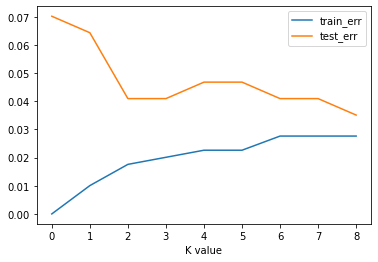

In [18]:
#K-NN
# try tune different K values
train_err_knn = []
test_err_knn = []
K_lst = np.arange(1,10,1)
for K in K_lst:
    learner = make_pipeline(StandardScaler(), KNeighborsClassifier(K))
    learner.fit(X_train, y_train)
    train_score = learner.score(X_train, y_train)
    test_score = learner.score(X_test, y_test)
    train_err_knn.append(1-train_score)
    test_err_knn.append(1-test_score)
plt.plot(train_err_knn, label = 'train_err')
plt.plot(test_err_knn, label = 'test_err')
plt.xlabel('K value')
plt.legend(loc="upper right")
plt.show()

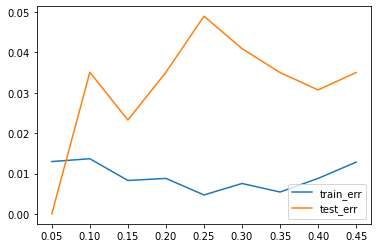

In [19]:
# support vector machine
# kernel_lst = ['linear', 'rbf']
# train_err_svm = np.empty((3,5))
# test_err_svm = np.empty((3,5))

# plt.figure(figsize=(8, 20))
# for i, kernel in enumerate(kernel_lst):
train_err_svm_linear = []
test_err_svm_linear = []
test_size_lst = np.arange(0.05,0.5,0.05)

for i,test_size in enumerate(test_size_lst):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=22,test_size=test_size)
    learner = make_pipeline(StandardScaler(), SVC(kernel='linear'))
    learner.fit(X_train, y_train)
    train_score = learner.score(X_train, y_train)
    test_score = learner.score(X_test, y_test)
    train_err_svm_linear.append(1-train_score)
    test_err_svm_linear.append(1-test_score)
plt.plot(test_size_lst, train_err_svm_linear, label = 'train_err')
plt.plot(test_size_lst,test_err_svm_linear, label = 'test_err')
plt.legend(loc="lower right")
plt.plot()
plt.show()

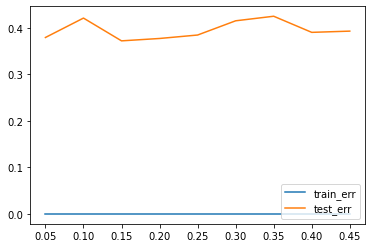

In [20]:
train_err_svm_rbf = []
test_err_svm_rbf = []
test_size_lst = np.arange(0.05,0.5,0.05)

for i,test_size in enumerate(test_size_lst):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=22,test_size=test_size)
    learner = make_pipeline(StandardScaler(), SVC(gamma=2))
    learner.fit(X_train, y_train)
    train_score = learner.score(X_train, y_train)
#     print(train_score)
    test_score = learner.score(X_test, y_test)
    train_err_svm_rbf.append(1-train_score)
    test_err_svm_rbf.append(1-test_score)
plt.plot(test_size_lst, train_err_svm_rbf, label = 'train_err')
plt.plot(test_size_lst,test_err_svm_rbf, label = 'test_err')
plt.legend(loc="lower right")
plt.plot()
plt.show()